<Figure size 432x288 with 0 Axes>

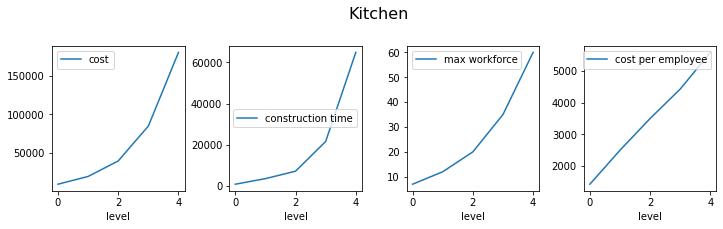

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0   10000               900                      7      10000   
1   20000              3600                     12      30000   
2   40000              7200                     20      70000   
3   85000             21600                     35     155000   
4  180000             64800                     60     335000   

   employer.costPerEmployee  
0               1428.571429  
1               2500.000000  
2               3500.000000  
3               4428.571429  
4               5583.333333  




<Figure size 432x288 with 0 Axes>

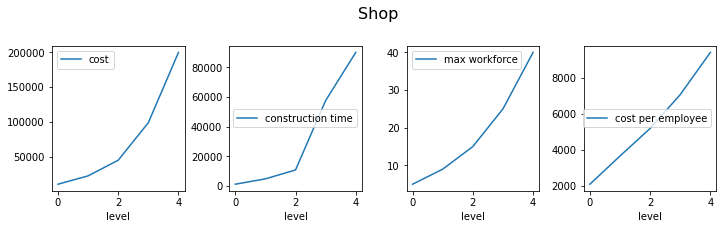

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0   10500              1200                      5      10500   
1   22500              4800                      9      33000   
2   45000             10800                     15      78000   
3   99000             57600                     25     177000   
4  200000             90000                     40     377000   

   employer.costPerEmployee  
0               2100.000000  
1               3666.666667  
2               5200.000000  
3               7080.000000  
4               9425.000000  




<Figure size 432x288 with 0 Axes>

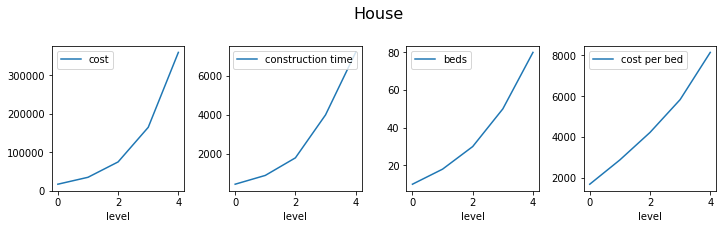

     cost  constructionTime  residence.beds  costTotal  residence.costPerBed
0   17000               450              10      17000           1700.000000
1   35000               900              18      52000           2888.888889
2   75000              1800              30     127000           4233.333333
3  165000              4000              50     292000           5840.000000
4  360000              7200              80     652000           8150.000000


    cost  constructionTime  costTotal
0  30000              3600      30000




<Figure size 432x288 with 0 Axes>

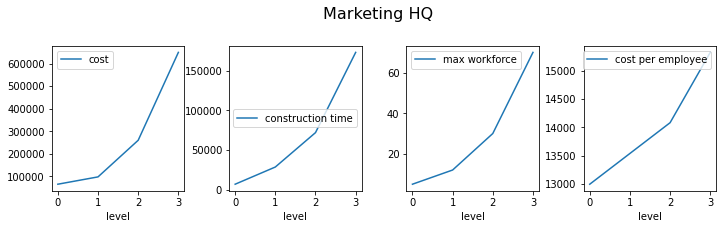

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0   65000              7200                      5      65000   
1   97500             28800                     12     162500   
2  260000             72000                     30     422500   
3  650000            172800                     70    1072500   

   employer.costPerEmployee  
0              13000.000000  
1              13541.666667  
2              14083.333333  
3              15321.428571  


     cost  constructionTime  costTotal
0  200000              9600     200000


In [133]:
from matplotlib import pyplot as plt
import pandas as pd
import requests, json
%matplotlib inline

url = requests.get("http://localhost:3000/api/gamedata")
data = json.loads(url.text)

for k in data['buildings']:
    b = data['buildings'][k]

    df = pd.json_normalize(b['levelInfos'], max_level=1)
    df['costTotal'] = df['cost'].cumsum()
    
    print('\n')
    
    if len(b['levelInfos']) < 2:
        print(df)
        continue
    
    plt.figure()
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    fig.suptitle(b['title'], fontsize=16)
    fig.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    axes[0].set_xlabel('level')
    axes[1].set_xlabel('level')
    axes[2].set_xlabel('level')
    axes[3].set_xlabel('level')
    
    df['cost'].plot(ax=axes[0], legend=True)
    
    df['constructionTime'].plot(ax=axes[1], legend=True, label='construction time')
    
    if 'employer.maxWorkforce' in df:
        df['employer.costPerEmployee'] =  df['costTotal'] / df['employer.maxWorkforce']
        df['employer.maxWorkforce'].plot(ax=axes[2], legend=True, label='max workforce')
        df['employer.costPerEmployee'].plot(ax=axes[3], legend=True, label='cost per employee')
        
    if 'residence.beds' in df:
        df['residence.costPerBed'] = df['costTotal'] / df['residence.beds']
        df['residence.beds'].plot(ax=axes[2], legend=True, label='beds')
        df['residence.costPerBed'].plot(ax=axes[3], legend=True, label='cost per bed')
        
    plt.show()
    print(df)

